In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.output_wrapper, .output {height:auto;}</style>"))

C:\Users\Ilham\AppData\Local\Temp\ipykernel_17564\3540611931.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# import library

import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import pyodbc
from sqlalchemy import create_engine

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

In [8]:
# test connection

# requests.get(link)

# link = 'https://id.wikipedia.org/wiki/Provinsi_di_Indonesia'
link = 'https://www.bukalapak.com/products?search%5Bkeywords%5D=sepeda%20lipat'
try:
    response = requests.get(link)
    if response.status_code == 200:
        print('requests http terhadap link berhasil')
    else:
        print('requests http terhadap link berhasil tetapi perlu hak akses')
except:
    print('requests http terhadap link tidak berhasil')


requests http terhadap link berhasil


<!DOCTYPE html>
<html lang="id-ID" xmlns="http://ogp.me/ns/fb#"><head><script async="" src="/ents-we-dested-their-had-tise-Cornesse-Exeunt-to"></script><meta charset="utf-8"/><title>Jual Produk Sepeda Lipat Termurah dan Terlengkap Oktober 2024 | Bukalapak</title><meta content="https://www.bukalapak.com/products" property="og:url"/><meta content="Bukalapak" property="og:site_name"/><link href="https://m.bukalapak.com/amp/products/s/sepeda%20lipat" rel="amphtml"/><link href="android-app://com.bukalapak.android/https/www.bukalapak.com/products/s/sepeda-lipat" rel="alternate"/><link href="https://m.bukalapak.com/products/s/sepeda-lipat" media="only screen and (max-width: 640px)" rel="alternate"/><meta content="1077645477673-l06bkk6fuvf3vcblkis6d057ksuh4e39.apps.googleusercontent.com" property="google:client_id"/><meta content="727108917352926" property="facebook:client_id"/><meta content="784705928" property="fb:admins"/><meta content="305662322778267" property="fb:app_id"/><meta content="
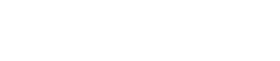

In [9]:
soup = BeautifulSoup(response.content, 'html.parser')
soup


In [16]:
ItemPrice = soup.findAll('p', {'class': 'bl-text bl-text--subheading-20 bl-text--semi-bold bl-text--ellipsis__1'})
Prices = []
for Price in ItemPrice:
    Prices.append(Price.text.strip())

df = pd.DataFrame(Prices, columns=['Prices'])
df


,Prices
0,Rp79.100
1,Rp256.000
2,Rp28.000.000
3,Rp15.350.000
4,Rp9.850.000
5,Rp1.050.000
6,Rp1.100.000
7,Rp1.050.000
8,Rp1.650.000
9,Rp10.499.900


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fungsi untuk mengambil halaman web
def fetch_page(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            print(f'HTTP request ke {url} berhasil')
            return response.content
        else:
            print(f'HTTP request ke {url} gagal dengan kode status {response.status_code}')
            return None
    except Exception as e:
        print(f'Terjadi kesalahan saat mengakses {url}: {e}')
        return None

# Fungsi untuk scraping nama barang dan harga
def scrape_items(page_content):
    soup = BeautifulSoup(page_content, 'html.parser')
    Items = []
    Prices = []
    
    # Cari elemen produk (gunakan selector yang sesuai)
    product_list = soup.find_all('div', {'class': 'bl-product-card'})

    # Iterasi setiap produk untuk mengambil nama barang dan harga dari elemen yang sama
    for product in product_list:
        # Scrape nama barang
        item_desc = product.find('p', {'class': 'bl-text bl-text--body-14 bl-text--ellipsis__2'})
        # Scrape harga barang
        item_price = product.find('p', {'class': 'bl-text bl-text--subheading-20 bl-text--semi-bold bl-text--ellipsis__1'})
        
        # Jika item dan harga ditemukan, tambahkan ke list
        if item_desc and item_price:
            Items.append(item_desc.text.strip())
            Prices.append(item_price.text.strip())
        else:
            print("Item atau harga tidak ditemukan untuk salah satu produk.")

    return Items, Prices

# URL halaman yang ingin di-scrape
url = 'https://www.bukalapak.com/products?search%5Bkeywords%5D=sepeda%20lipat'

# Ambil halaman
page_content = fetch_page(url)

# Scrape items dan prices secara berpasangan
if page_content:
    Items, Prices = scrape_items(page_content)

    # Buat DataFrame dengan dua kolom: ItemName dan Price
    df = pd.DataFrame({
        'ItemName': Items,
        'Price': Prices
    })

    # Cetak DataFrame
    print(df)
else:
    print("Tidak ada konten yang bisa di-scrape.")


HTTP request ke https://www.bukalapak.com/products?search%5Bkeywords%5D=sepeda%20lipat berhasil
                                                                                             ItemName  \
0                                 Paket Kabel Shifter TRLREQ Set Sepeda Lipat MTB Roadbike Front Rear   
1    Sadel Jok Sepeda Empuk MTB Gunung Lipat Fixie Ontel Saddle Soft Hollow Cushion ROCKBROS 38210006   
2                              Xiaomi QiCycle EF1 Sepeda Listrik Lipat Moped Smart Bike China Version   
3          Element Sepeda Lipat 20 Inchi FoldX Lite Damn  I Love Indonesia Limited Edition New Design   
4                                  Sepeda Lipat Element Ecosmo 10 Speed LIMITED EDITION SUMPAH PEMUDA   
5                                                 Sepeda 16 Lipat Odessy Ritz 7Speeda Cakram New 2021   
6                                                              Sepeda  Lipat 20 Odessy Ritz Boncengan   
7                                                    Sepeda 16 L

In [21]:
## Insert langsung ke table nya tanpa harus create dulu
server = 'DESKTOP-B14RR7Q,1433'
database = 'Abstract'
username = 'sa'
password = '123'
driver = 'ODBC Driver 17 for SQL Server'

connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver={driver}'

engine = create_engine(connection_string)

table_name = 'Test'
df.to_sql(table_name, con=engine, if_exists='append', index=False)

print("Data inserted successfully!")


Data inserted successfully!
